<a href="https://colab.research.google.com/github/All4Nothing/pytorch-DL-programming/blob/main/Ch08_Mnist_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such 

In [5]:
# ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [1]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Ìè∞Ìä∏ Í¥ÄÎ†® Ïö©ÎèÑ
import matplotlib.font_manager as fm

# ÎÇòÎàî Í≥†Îîï Ìè∞Ìä∏Ïùò Í≤ΩÎ°ú Î™ÖÏãú
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [2]:
# ÌååÏù¥ÌÜ†Ïπò Í¥ÄÎ†® ÎùºÏù¥Î∏åÎü¨Î¶¨

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

In [3]:
# Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = font_name

# Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÇ¨Ïù¥Ï¶à Î≥ÄÍ≤Ω
plt.rcParams['font.size'] = 14

# Í∏∞Î≥∏ Í∑∏ÎûòÌîÑ ÏÇ¨Ïù¥Ï¶à Î≥ÄÍ≤Ω
plt.rcParams['figure.figsize'] = (6,6)

# Í∏∞Î≥∏ Í∑∏Î¶¨Îìú ÌëúÏãú
# ÌïÑÏöîÏóê Îî∞Îùº ÏÑ§Ï†ïÌï† ÎïåÎäî, plt.grid()
plt.rcParams['axes.grid'] = True

# ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Ï†ïÏÉÅ Ï∂úÎ†•
plt.rcParams['axes.unicode_minus'] = False

# ÎÑòÌååÏù¥ Î∂ÄÎèôÏÜåÏàòÏ†ê ÏûêÎ¶øÏàò ÌëúÏãú
np.set_printoptions(suppress=True, precision=4)

# 08. MNISTÎ•º ÌôúÏö©Ìïú Ïà´Ïûê Ïù∏Ïãù

## 8.3 Ïã†Í≤ΩÎßùÍ≥º Îî•Îü¨Îãù

2Í∞ú Ï∏µ Ïù¥ÏÉÅÏùò ÏÑ†Ìòï Ìï®ÏàòÎ°ú Ïù¥Î§ÑÏßÑ Î™®Îç∏Ïù¥ Îî•Îü¨ÎãùÏùò Ï∂úÎ∞úÏ†ê

## 8.4 ÌôúÏÑ±Ìôî Ìï®ÏàòÏôÄ ReLU Ìï®Ïàò

Ï∏µÏù¥ ÍπäÏùÄ Ïã†Í≤ΩÎßùÏóê Í¥ÄÌï¥, Îã®ÏßÄ ÏÑ†Ìòï Ìï®ÏàòÏùò Í≤∞Í≥ºÎ•º Ïù¥Ïñ¥ÏßÄÎäî ÏùÄÎãâÏ∏µÏúºÎ°ú ÏûÖÎ†•ÌïòÎäî Í≤ÉÎßåÏúºÎ°úÎäî, ÏïÑÎ¨¥Î¶¨ Ï∏µÏù¥ ÍπäÏùÑÏßÄÎùºÎèÑ, ÌïòÎÇòÏùò Ï∏µÏúºÎ°ú Ïù¥Î§ÑÏßÑ Î™®Îç∏Í≥º ÏàòÌïôÏ†ÅÏúºÎ°ú Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.
Ï∏µÏù¥ ÍπäÏùÄ Ïã†Í≤ΩÎßùÏù¥ Ïú†ÏùòÎØ∏ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî ÏÑ†Ìòï Ìï®ÏàòÎ•º ÌÜµÌïú Í≥ÑÏÇ∞ Í≤∞Í≥ºÏóê 'ÎπÑÏÑ†Ìòï Ìï®Ïàò'Î°ú Î∂àÎ¶¨Îäî Ìï®ÏàòÎ•º Ï†ÅÏö©ÏãúÏºúÏïº ÌïúÎã§.

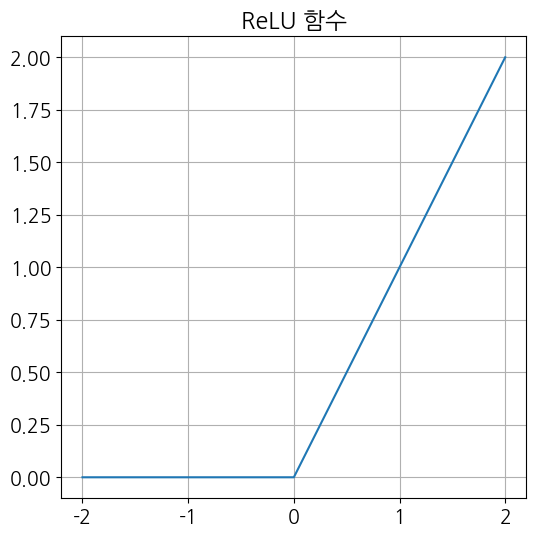

In [4]:
# ReLU Ìï®ÏàòÏùò Í∑∏ÎûòÌîÑ

relu = nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title('ReLU Ìï®Ïàò')
plt.show()

## 8.5 GPU ÏÇ¨Ïö©ÌïòÍ∏∞

Îü∞ÌÉÄÏûÑ - Îü∞ÌÉÄÏûÑ Ïú†Ìòï Î≥ÄÍ≤Ω - GPU

ÏºÄÎùºÏä§Ïùò Í≤ΩÏö∞, GPU ÏÇ¨Ïö© Ïó¨Î∂ÄÎäî ÏãúÏä§ÌÖú(ÌîÑÎ†àÏûÑÏõåÌÅ¨)Ïù¥ Ï≤¥ÌÅ¨Ìï¥ÏÑú ÏÇ¨Ïö© Í∞ÄÎä•ÌïòÎã§Î©¥ ÌîÑÎ°úÍ∑∏Îû®ÏùÑ ÏùòÏãùÌïòÏßÄ ÏïäÍ≥†, ÏûêÎèôÏ†ÅÏúºÎ°ú GPUÎ•º ÏÇ¨Ïö©ÌïúÎã§.
ÌååÏù¥ÌÜ†ÏπòÎäî ÌîÑÎ°úÍ∑∏Îû®ÏóêÏÑú Ìï≠ÏÉÅ GPUÎ•º Ïù∏ÏãùÏãúÏºúÏ§òÏïº ÌïúÎã§.

### GPU ÎîîÎ∞îÏù¥Ïä§ ÌôïÏù∏

In [5]:
# ÎîîÎ∞îÏù¥Ïä§ Ìï†Îãπ
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### GPU ÏÇ¨Ïö© Í∑úÏπô
1. ÌÖêÏÑú Î≥ÄÏàòÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä CPUÏôÄ GPU Ï§ë Ïñ¥ÎîîÏóê ÏÜçÌï¥ ÏûàÎäîÏßÄÎ•º ÏÜçÏÑ±ÏúºÎ°ú Í∞ñÎäîÎã§.
2. CPUÏôÄ GPU ÏÇ¨Ïù¥ÏóêÏÑú Îç∞Ïù¥ÌÑ∞Îäî to Ìï®ÏàòÎ°ú Ï†ÑÏÜ°ÌïúÎã§.
3. Îëê Í∞úÏùò Î≥ÄÏàòÍ∞Ä Î™®Îëê GPUÏóê Ïò¨ÎùºÍ∞Ä ÏûàÎäî Í≤ΩÏö∞, Ïó∞ÏÇ∞ÏùÄ GPUÎ°ú ÏàòÌñâÌïúÎã§.
4. Îëê Î≥ÄÏàò Ï§ë ÌïúÏ™ΩÏù¥ CPU, Îã§Î•∏ ÌïúÏ™ΩÏù¥ GPUÏóê Ïò¨ÎùºÍ∞Ä ÏûàÎäî Í≤ΩÏö∞, Ïó∞ÏÇ∞ÏùÄ ÏóêÎü¨Î•º Î∞úÏÉùÏãúÌÇ®Îã§.

In [6]:
# ÌÖêÏÑú Î≥ÄÏàò x, y
x_np = np.arange(-2.0, 2.1, 0.25)
y_np = np.arange(-1.0, 3.1, 0.25)
x = torch.tensor(x_np).float()
y = torch.tensor(y_np).float()

# xÏôÄ y ÏÇ¨Ïù¥Ïùò Ïó∞ÏÇ∞
z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000])


In [7]:
# Î≥ÄÏàò xÎ•º GPUÎ°ú Î≥¥ÎÉÑ
x = x.to(device)

# Î≥ÄÏàò xÏôÄ yÏùò ÎîîÎ∞îÏù¥Ïä§ ÏÜçÏÑ± ÌôïÏù∏
print('x: ', x.device)
print('y: ', y.device)

x:  cuda:0
y:  cpu


In [8]:
# Ïù¥ ÏÉÅÌÉúÏóêÏÑú xÏôÄ yÏùò Ïó∞ÏÇ∞ÏùÑ ÏàòÌñâÌïòÎ©¥...

z = x * y

RuntimeError: ignored

In [9]:
# yÎèÑ GPUÎ°ú Î≥¥ÎÉÑ
y = y.to(device)

# Ïó∞ÏÇ∞Ïù¥ Í∞ÄÎä•Ìï¥Ïßê
z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000], device='cuda:0')


## 8.7 ÎØ∏Îãà Î∞∞Ïπò ÌïôÏäµÎ≤ï

- Î∞∞Ïπò ÌïôÏäµÎ≤ï : ÏõêÎûòÏùò ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥ Í±¥ÏàòÎ°ú Ìïú Î≤àÏóê Í≤ΩÏÇ¨ Í≥ÑÏÇ∞ÏùÑ ÌïòÎäî Î∞©Ïãù
- ÎØ∏Îãà Î∞∞Ïπò ÌïôÏäµÎ≤ï : ÏÇ¨Ï†ÑÏóê Ìï©ÏùòÎêú Í±¥ ÏàòÎßåÌÅº Í∑∏Î£πÏùÑ ÎßåÎì§Ïñ¥, Í∑∏Î£π Îã®ÏúÑÎ°ú Í≤ΩÏÇ¨Î•º Í≥ÑÏÇ∞ÌïòÎäî Î∞©Î≤ï
ÌååÏù¥ÌÜ†ÏπòÏóêÏÑúÎäî Í∞ÑÎã®ÌïòÍ≤å ÎØ∏Îãà Î∞∞Ïπò ÌïôÏäµÎ≤ïÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù Data Loader ÎùºÎäî Ïû•ÏπòÍ∞Ä ÏûàÎã§.

## 8.8 Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ 1 (DatasetÏùÑ ÌôúÏö©Ìï¥ Î∂àÎü¨Ïò§Í∏∞)

ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÎ•º ÏúÑÌïú ÌååÏù¥ÌÜ†Ïπò ÎèÑÍµ¨Îì§
- Îç∞Ïù¥ÌÑ∞ ÏûÖÏàò : Dataset
- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ : Transforms
- ÎØ∏Îãà Î∞∞ÏπòÏö© Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± : DataLoader

### Îç∞Ïù¥ÌÑ∞ ÏûÖÏàò

In [10]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import torchvision.datasets as datasets

# Îã§Ïö¥Î°úÎìúÎ∞õÏùÑ ÎîîÎ†âÌÑ∞Î¶¨Î™Ö
data_root = './data'

train_set0 = datasets.MNIST(
    # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î°úÎìúÎ∞õÏùÑ ÎîîÎ†âÌÑ∞Î¶¨ ÏßÄÏ†ï
    root = data_root,
    # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïù∏ÏßÄ ÎòêÎäî Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïù∏ÏßÄ
    train = True,
    # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÎäî Í≤ΩÏö∞, Îã§Ïö¥Î°úÎìúÎ•º Ïã§ÌñâÌïòÎäîÏßÄ Ïó¨Î∂Ä
    download = True)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9912422/9912422 [00:00<00:00, 115139788.93it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 28881/28881 [00:00<00:00, 114171247.71it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1648877/1648877 [00:00<00:00, 35989526.64it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4542/4542 [00:00<00:00, 21623755.70it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [11]:
# Îã§Ïö¥Î°úÎìúÌïú ÌååÏùº ÌôïÏù∏

!ls -lR ./data/MNIST

./data/MNIST:
total 4
drwxr-xr-x 2 root root 4096 Jun 19 14:35 raw

./data/MNIST/raw:
total 65008
-rw-r--r-- 1 root root  7840016 Jun 19 14:35 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root  1648877 Jun 19 14:35 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    10008 Jun 19 14:35 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root     4542 Jun 19 14:35 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 47040016 Jun 19 14:35 train-images-idx3-ubyte
-rw-r--r-- 1 root root  9912422 Jun 19 14:35 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    60008 Jun 19 14:35 train-labels-idx1-ubyte
-rw-r--r-- 1 root root    28881 Jun 19 14:35 train-labels-idx1-ubyte.gz


In [12]:
# Îç∞Ïù¥ÌÑ∞ Í±¥Ïàò ÌôïÏù∏
print('Îç∞Ïù¥ÌÑ∞ Í±¥Ïàò: ', len(train_set0))

# Ï≤´Î≤àÏß∏ ÏöîÏÜå Í∞ÄÏ†∏Ïò§Í∏∞
image, label = train_set0[0]

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
print('ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ : ', type(image))
print('Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ : ', type(label))

Îç∞Ïù¥ÌÑ∞ Í±¥Ïàò:  60000
ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ :  <class 'PIL.Image.Image'>
Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ :  <class 'int'>


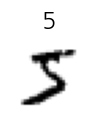

In [13]:
# ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Î•º Ïù¥ÎØ∏ÏßÄÎ°ú Ï∂úÎ†•

plt.figure(figsize=(1,1))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

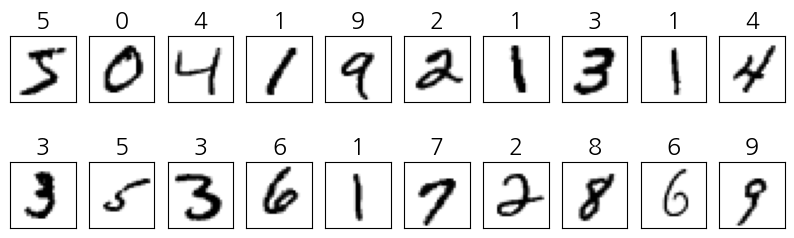

In [14]:
# Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞ÏôÄ Ìï®Íªò Ï≤òÏùå 20Í∞ú Îç∞Ïù¥ÌÑ∞Î•º Ïù¥ÎØ∏ÏßÄÎ°ú Ï∂úÎ†•

plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)

    # imageÏôÄ label Ï∑®Îìù
    image, label = train_set0[i]

    # Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
    plt.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

ÎùºÏù¥Î∏åÎü¨Î¶¨Î°ú Ï§ÄÎπÑÎêú dataset.MNIST ÌÅ¥ÎûòÏä§Ïùò Ïù∏Ïä§ÌÑ¥Ïä§ Î≥ÄÏàòÏù∏ train_set0Í∞Ä, ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ Í∞êÏ∂òÏ±Ñ ÌååÏù¥Ïç¨ÏúºÎ°ú ÏÇ¨Ïö©ÌïòÍ∏∞ Í∞ÑÌé∏ÌïúÎ¶¨Ïä§Ìä∏ ÌòïÌÉúÏùò Ïù∏ÌÑ∞ÌéòÏù¥Ïä§Î•º Ï†úÍ≥µÌïòÍ≥† ÏûàÎã§.

## 8.9 Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ 2 (TransformsÎ•º ÌôúÏö©Ìïú Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨)

### Ïä§ÌÖù 1. ToTensor ÏÇ¨Ïö©ÌïòÍ∏∞

In [17]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import torchvision.transforms as transforms

transform1 = transforms.Compose([
    # Îç∞Ïù¥ÌÑ∞Î•º ÌÖêÏÑúÎ°ú Î≥ÄÌôò
    # image Î≥ÄÏàòÍ∞Ä ÌÖêÏÑú Î≥ÄÏàòÎ°ú Î≥ÄÌôòÎê®
    transforms.ToTensor(),
])

train_set1 = datasets.MNIST(
    root=data_root,  train=True,  download=True,
    transform = transform1)

In [18]:
# Î≥ÄÌôò Í≤∞Í≥º ÌôïÏù∏

image, label = train_set1[0]
print('ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ : ', type(image))
print('ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ shape : ', image.shape)
print('ÏµúÏÜüÍ∞í : ', image.data.min())
print('ÏµúÎåìÍ∞í : ', image.data.max())

ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ :  <class 'torch.Tensor'>
ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ shape :  torch.Size([1, 28, 28])
ÏµúÏÜüÍ∞í :  tensor(0.)
ÏµúÎåìÍ∞í :  tensor(1.)


### Ïä§ÌÖù 2. Normalize ÏÇ¨Ïö©ÌïòÍ∏∞

Normalize ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©Ìï¥ÏÑú Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÍ∑úÌôîÌïúÎã§.
Normalize$(Œº,œÉ)Î°ú ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ùí≥ Îäî ùêó=(ùí≥-Œº)/œÉÏóê Îî∞Îùº Î≥ÄÌôòÎêúÎã§.

In [20]:
transform2 = transforms.Compose([
    # Îç∞Ïù¥ÌÑ∞Î•º ÌÖêÏÑúÎ°ú Î≥ÄÌôò
    transforms.ToTensor(),

    # Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
    transforms.Normalize(0.5,  0.5), # Î≤îÏúÑ [0,1] -> [-1,1]
])

train_set2 = datasets.MNIST(
    root = data_root,  train = True,  download = True,
    transform = transform2)

In [21]:
# Î≥ÄÌôò Í≤∞Í≥º ÌôïÏù∏

image, label = train_set2[0]
print('shape : ', image.shape)
print('ÏµúÏÜüÍ∞í : ', image.data.min())
print('ÏµúÎåìÍ∞í : ', image.data.max())

shape :  torch.Size([1, 28, 28])
ÏµúÏÜüÍ∞í :  tensor(-1.)
ÏµúÎåìÍ∞í :  tensor(1.)


### Ïä§ÌÖù 3. Lambda ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©Ìï¥ 1Ï∞®ÏõêÏúºÎ°ú ÌÖêÏÑú Î≥ÄÌôòÌïòÍ∏∞

FCNN Ïã†Í≤ΩÎßùÏóê ÏûÖÎ†•ÌïòÍ∏∞ ÏúÑÌï¥, ÏûÖÎ†• Î≥ÄÏàòÏùò shapeÎ•º ÏõêÎ≥∏ [1, 28, 28]ÏóêÏÑú [784]Î°ú Î≥ÄÍ≤Ω

In [23]:
transform3 = transforms.Compose([
    # Îç∞Ïù¥ÌÑ∞Î•º ÌÖêÏÑúÎ°ú Î≥ÄÌôò
    transforms.ToTensor(),

    # Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
    transforms.Normalize(0.5, 0.5),

    # ÌòÑÏû¨ ÌÖêÏÑúÎ•º 1Í≥Ñ ÌÖêÏÑúÎ°ú Î≥ÄÌôò
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set3 = datasets.MNIST(
    root = data_root,  train = True,
    download=True, transform = transform3)

In [25]:
# Î≥ÄÌôò Í≤∞Í≥º ÌôïÏù∏

image, label = train_set3[0]
print('shape : ', image.shape)
print('ÏµúÏÜüÍ∞í : ', image.data.min())
print('ÏµúÎåìÍ∞í : ', image.data.max())

shape :  torch.Size([784])
ÏµúÏÜüÍ∞í :  tensor(-1.)
ÏµúÎåìÍ∞í :  tensor(1.)


Transforms ÏµúÏ¢Ö Íµ¨ÌòÑ ÌòïÌÉú

In [26]:
# Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôòÏö© Ìï®Ïàò Transforms
# (1) ImageÎ•º ÌÖêÏÑúÌôî
# (2) [0, 1] Î≤îÏúÑÏùò Í∞íÏùÑ [-1, 1] Î≤îÏúÑÎ°ú Ï°∞Ï†ï
# (3) Îç∞Ïù¥ÌÑ∞Ïùò shapeÏùÑ [1, 28, 28] ÏóêÏÑú [784] Î°ú Î≥ÄÌôò

transform = transforms.Compose([
    # (1) Îç∞Ïù¥ÌÑ∞Î•º ÌÖêÏÑúÎ°ú Î≥ÄÌôò
    transforms.ToTensor(),

    # (2) Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
    transforms.Normalize(0.5, 0.5),

    # (3) 1Í≥Ñ ÌÖêÏÑúÎ°ú Î≥ÄÌôò
    transforms.Lambda(lambda x: x.view(-1)),
])

In [27]:
# Îç∞Ïù¥ÌÑ∞ ÏûÖÏàòÎ•º ÏúÑÌïú Dataset Ìï®Ïàò

# ÌõàÎ†®Ïö© Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÏùò
train_set = datasets.MNIST(
    root = data_root, train = True,
    download = True, transform = transform)

# Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÏùò
test_set = datasets.MNIST(
    root = data_root, train = False,
    download = True, transform = transform)

## 8.10 Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ 3 (Îç∞Ïù¥ÌÑ∞Î°úÎçîÎ•º ÌôúÏö©Ìïú ÎØ∏Îãà Î∞∞Ïπò Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

In [29]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
from torch.utils.data import DataLoader

# ÎØ∏Îãà Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶à ÏßÄÏ†ï
## batch_size : ÎØ∏Îãà Î∞∞Ïπò Ï≤òÎ¶¨ Ìïú Î≤àÎãπ ÏñºÎßàÎÇò ÎßéÏùÄ Î∂ÑÎüâÏùò Îç∞Ïù¥ÌÑ∞Î•º Ï∑®Ìï† Í≤ÉÏù∏Í∞Ä
batch_size = 500

# ÌõàÎ†®Ïö© Îç∞Ïù¥ÌÑ∞Î°úÎçî
# ÌõàÎ†®Ïö©Ïù¥ÎØÄÎ°ú, ÏÖîÌîåÏùÑ Ï†ÅÏö©Ìï®
train_loader = DataLoader(
    train_set, batch_size = batch_size,
    shuffle = True)

# Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞Î°úÎçî
# Í≤ÄÏ¶ùÏãúÏóêÎäî ÏÖîÌîåÏùÑ ÌïÑÏöîÎ°úÌïòÏßÄ ÏïäÏùå
## shuffle : ÎÇúÏàòÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏÑûÏùÑÏßÄ Ïó¨Î∂Ä
test_loader = DataLoader(
    test_set,  batch_size = batch_size,
    shuffle = False)

In [31]:
# Î™á Í∞úÏùò Í∑∏Î£πÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏Ïò¨ Ïàò ÏûàÎäîÍ∞Ä
print(len(train_loader)) # == 60000/500

# Îç∞Ïù¥ÌÑ∞Î°úÎçîÎ°úÎ∂ÄÌÑ∞ Í∞ÄÏû• Ï≤òÏùå Ìïú ÏÑ∏Ìä∏Î•º Í∞ÄÏ†∏Ïò¥
for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

120
torch.Size([500, 784])
torch.Size([500])


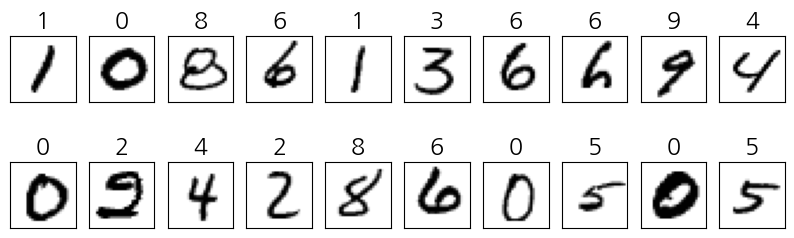

In [32]:
# Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)

    # ÎÑòÌååÏù¥Î°ú Î∞∞Ïó¥Î°ú Î≥ÄÌôò
    image = images[i].numpy()
    label = labels[i]

    # Ïù¥ÎØ∏ÏßÄÏùò Î≤îÏúÑÎ•º [0, 1] Î°ú ÎêòÎèåÎ¶º
    image2 = (image + 1)/ 2

    # Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
    plt.imshow(image2.reshape(28, 28),cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 8.11 Î™®Îç∏ Ï†ïÏùò

In [36]:
# ÏûÖÎ†• Ï∞®ÏõêÏàò
n_input = image.shape[0]

# Ï∂úÎ†• Ï∞®ÏõêÏàò
# Î∂ÑÎ•ò ÌÅ¥ÎûòÏä§ ÏàòÎäî 10
n_output = len(list(set(labels.data.numpy())))

# ÏùÄÎãâÏ∏µÏùò ÎÖ∏Îìú Ïàò
n_hidden = 128

# Í≤∞Í≥º ÌôïÏù∏
print(f'n_input: {n_input}  n_hidden: {n_hidden} n_output: {n_output}')

n_input: 784  n_hidden: 128 n_output: 10


In [37]:
# Î™®Îç∏ Ï†ïÏùò
# 784ÏûÖÎ†• 10Ï∂úÎ†• 1ÏùÄÎãâÏ∏µÏùò Ïã†Í≤ΩÎßù Î™®Îç∏

class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # ÏùÄÎãâÏ∏µ Ï†ïÏùò(ÏùÄÎãâÏ∏µ ÎÖ∏Îìú Ïàò : n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # Ï∂úÎ†•Ï∏µ Ï†ïÏùò
        self.l2 = nn.Linear(n_hidden, n_output)

        # ReLU Ìï®Ïàò Ï†ïÏùò
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

ÎëêÎ≤àÏß∏(Ï∂úÎ†•Ï∏µ) ÏÑ†Ìòï Ìï®ÏàòÏùò Ï∂úÎ†•Ïóê ÎåÄÌï¥ÏÑú ÌôúÏÑ±Ìôî Ìï®ÏàòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ, ÏÜêÏã§ Ìï®Ïàò Ï™ΩÏóê ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®ÏàòÎ•º Ìè¨Ìï®Ìï† ÏòàÏ†ïÏù¥Í∏∞ ÎïåÎ¨∏

ÏßÄÍ∏àÍπåÏßÄÏùò Íµ¨ÌòÑÍ≥º Îã¨Î¶¨, ÌååÎùºÎØ∏ÌÑ∞Ïùò Ï¥àÍπÉÍ∞íÏùÑ Î™®Îëê 1.0ÏúºÎ°ú ÏÑ§Ï†ïÌñàÎçò Î∂ÄÎ∂ÑÏù¥ ÏóÜÎã§.
Î™®Îì† ÏöîÏÜåÏùò Í∞íÏùÑ 1.0ÏúºÎ°ú ÏÑ§Ï†ïÌïòÎ©¥, Î™®Îç∏Ïùò ÌååÎùºÎØ∏ÌÑ∞ ÏàòÍ∞Ä Î∞©ÎåÄÌïú ÌÉìÏóê ÌïôÏäµÏù¥ Ïûò Ïù¥Î§ÑÏßÄÏßÄ ÏïäÎäîÎã§.
Îî∞ÎùºÏÑú, ÎÇúÏàòÎ•º ÏÇ¨Ïö©Ìïú Í∞ÄÏû• Ï†ÅÌï©Ìïú Ï¥àÍπÉÍ∞í ÏÑ§Ï†ïÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÎäî Î∞©Ïπ®ÏùÑ Ï∑®Ìïú Í≤É

In [38]:
# ÎÇúÏàò Í≥†Ï†ï
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# Î™®Îç∏ Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
net = Net(n_input, n_output, n_hidden)

# Î™®Îç∏ÏùÑ GPUÎ°ú Ï†ÑÏÜ°
net = net.to(device)

### ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶òÍ≥º ÏÜêÏã§ Ìï®Ïàò

In [39]:
# ÌïôÏäµÎ•†
lr = 0.01

# ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶ò: Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# ÏÜêÏã§ Ìï®ÏàòÔºö ÍµêÏ∞® ÏóîÌä∏Î°úÌîº Ìï®Ïàò
criterion = nn.CrossEntropyLoss()

### Î™®Îç∏ ÌôïÏù∏


In [40]:
# Î™®Îç∏ ÎÇ¥Î∂Ä ÌååÎùºÎØ∏ÌÑ∞ ÌôïÏù∏
# l1.weight, l1.bias, l2.weight, l2.biasÎ•º ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

for parameter in net.named_parameters():
    print(parameter)

('l1.weight', Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0277,  0.0200,  0.0315],
        [ 0.0184, -0.0322,  0.0175,  ...,  0.0089, -0.0028, -0.0033],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0322, -0.0059, -0.0169],
        [-0.0328, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       device='cuda:0', requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 0.0325, -0.0298,  0.0013,  0.0199,  0.0268, -0.0248, -0.0172, -0.0355,
         0.0122, -0.0048,  0.0214,  0.0202, -0.0243,  0.0015, -0.0276,  0.0296,
         0.0341, -0.0228,  0.0230,  0.0347, -0.0091, -0.0346,  0.0206, -0.0060,
         0.0329,  0.0047,  0.0180,  0.0101,  0.0177, -0.0309,  0.0228, -0.0224,
         0.0321,  0.0179,  0.0321,  0.0184,  0.0219, -0.0089,  0.0310, -0.0039,
        -0.0074, -0.0317,  0.0192, -0.0021,  0.0190

In [41]:
# Î™®Îç∏ Í∞úÏöî ÌëúÏãú 1

print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [42]:
# Î™®Îç∏ Í∞úÏöî ÌëúÏãú 2

summary(net, (784,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [10]                      --
‚îú‚îÄLinear: 1-1                            [128]                     100,480
‚îú‚îÄReLU: 1-2                              [128]                     --
‚îú‚îÄLinear: 1-3                            [10]                      1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 12.87
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.41
Estimated Total Size (MB): 0.41

## 8.12 Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï

### ÏòàÏ∏° Í≥ÑÏÇ∞

In [43]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í∞ÄÏû• Ï≤òÏùå Ìï≠Î™©ÏùÑ Ï∑®Îìù
# Îç∞Ïù¥ÌÑ∞Î°úÎçîÏóêÏÑú Í∞ÄÏû• Ï≤òÏùå Ìï≠Î™©ÏùÑ Ï∑®Îìù
for images, labels in train_loader:
    break

In [45]:
# Îç∞Ïù¥ÌÑ∞Î°úÎçîÏóêÏÑú Ï∑®ÎìùÌïú Îç∞Ïù¥ÌÑ∞Î•º GPUÎ°ú Î≥¥ÎÉÑ
inputs = images.to(device)
labels = labels.to(device)

In [46]:
# ÏòàÏ∏° Í≥ÑÏÇ∞
outputs = net(inputs)

# Í≤∞Í≥º ÌôïÏù∏
print(outputs)

tensor([[-0.3622, -0.1927, -0.0179,  ...,  0.1073,  0.1025, -0.0615],
        [-0.4072, -0.1814,  0.0716,  ...,  0.1866,  0.1975,  0.1161],
        [-0.3221, -0.0547, -0.2868,  ...,  0.1967, -0.0103,  0.1591],
        ...,
        [-0.2091, -0.1058,  0.2365,  ...,  0.1360,  0.0665,  0.0987],
        [-0.2756, -0.2012,  0.1703,  ...,  0.1223,  0.2388,  0.0233],
        [-0.3045, -0.2458,  0.1416,  ...,  0.1012,  0.0820, -0.1457]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


### ÏÜêÏã§ Í≥ÑÏÇ∞

2.3328874111175537


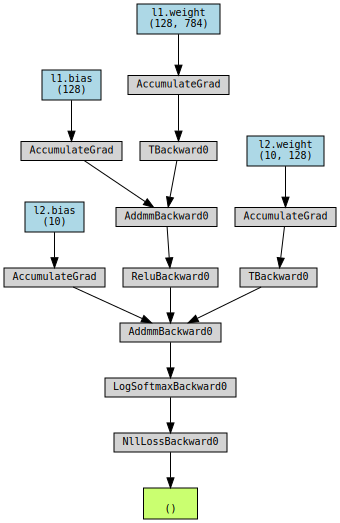

In [47]:
#  ÏÜêÏã§ Í≥ÑÏÇ∞
loss = criterion(outputs, labels)

# ÏÜêÏã§Í∞í Í∞ÄÏ†∏Ïò§Í∏∞
print(loss.item())

# ÏÜêÏã§ Í≥ÑÏÇ∞ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

weightÏôÄ biasÍ∞Ä ÎëêÍ∞úÏù∏ Í≤ÉÏùÄ, ÏÑ†Ìòï Ìï®ÏàòÎ•º Î™®Îç∏Ïóê Îëê Í∞ú ÏÇ¨Ïö©Ìïú Í≤É(=ÏùÄÎãâÏ∏µÏù¥ Ìè¨Ìï®Ìïú Î™®Îç∏ÏùÑ ÏûëÏÑ±ÌñàÏùå)ÏùÑ ÏùòÎØ∏

### Í≤ΩÏÇ¨ Í≥ÑÏÇ∞

In [48]:
# Í≤ΩÏÇ¨ Í≥ÑÏÇ∞ Ïã§Ìñâ
loss.backward()

In [49]:
# Í≤ΩÏÇ¨ Í≥ÑÏÇ∞ Í≤∞Í≥º
w = net.to('cpu')
print(w.l1.weight.grad.numpy())
print(w.l1.bias.grad.numpy())
print(w.l2.weight.grad.numpy())
print(w.l2.bias.grad.numpy())

[[-0.0007 -0.0007 -0.0007 ... -0.0007 -0.0007 -0.0007]
 [ 0.0077  0.0077  0.0077 ...  0.0077  0.0077  0.0077]
 [-0.0018 -0.0018 -0.0018 ... -0.0018 -0.0018 -0.0018]
 ...
 [-0.0008 -0.0008 -0.0008 ... -0.0008 -0.0008 -0.0008]
 [ 0.0011  0.0011  0.0011 ...  0.0011  0.0011  0.0011]
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]]
[ 0.0007 -0.0077  0.0018  0.0008 -0.      0.      0.0014 -0.0008  0.0025
 -0.0016  0.0009 -0.002   0.0006  0.0025 -0.0026  0.0008  0.0061 -0.0011
 -0.0018  0.008   0.0063  0.0026 -0.0036  0.0056 -0.0006 -0.0038  0.0034
  0.     -0.0026 -0.0032 -0.0006  0.0034  0.0018  0.      0.0001  0.0002
  0.0047 -0.0012  0.0022  0.0018  0.0037 -0.0061  0.0011  0.0097 -0.0017
 -0.0012 -0.0004 -0.001  -0.0031 -0.0003 -0.0008  0.0004  0.0001 -0.0016
 -0.002  -0.0001 -0.0006 -0.0024 -0.0004  0.0029  0.0013 -0.0085  0.0013
  0.0015  0.     -0.0006  0.004  -0.0016 -0.0052  0.0003 -0.0031  0.0001
  0.0009 -0.0017 -0.0069 -0.0028  0.0017 -0.003   0.0012  0.0024  0.0011
 -0.002

### ÌååÎùºÎØ∏ÌÑ∞ ÏàòÏ†ï

In [50]:
# Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï Ï†ÅÏö©
optimizer.step()

In [51]:
# ÌååÎùºÎØ∏ÌÑ∞ Í∞í Ï∂úÎ†•
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0278,  0.0200,  0.0316],
        [ 0.0183, -0.0322,  0.0174,  ...,  0.0088, -0.0029, -0.0034],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0323, -0.0059, -0.0169],
        [-0.0329, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       requires_grad=True)
Parameter containing:
tensor([ 3.2475e-02, -2.9682e-02,  1.2742e-03,  1.9874e-02,  2.6836e-02,
        -2.4759e-02, -1.7201e-02, -3.5517e-02,  1.2199e-02, -4.7449e-03,
         2.1379e-02,  2.0187e-02, -2.4297e-02,  1.4928e-03, -2.7613e-02,
         2.9618e-02,  3.4051e-02, -2.2777e-02,  2.2983e-02,  3.4580e-02,
        -9.1870e-03, -3.4619e-02,  2.0599e-02, -6.0632e-03,  3.2937e-02,
         4.7784e-03,  1.7949e-02,  1.0102e-02,  1.7700e-02, -3.0853e-02,
         2.2817e-02, -2.2391e-02,  3.2049e-02,  1.7890e-0

### Î∞òÎ≥µ Í≥ÑÏÇ∞

In [55]:
# ÎÇúÏàò Í≥†Ï†ï
torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

# ÌïôÏäµÎ•†
lr = 0.01

# Î™®Îç∏ Ï¥àÍ∏∞Ìôî
net = Net(n_input, n_output, n_hidden).to(device)

# ÏÜêÏã§ Ìï®ÏàòÔºö ÍµêÏ∞® ÏóîÌä∏Î°úÌîº Ìï®Ïàò
criterion = nn.CrossEntropyLoss()

# ÏµúÏ†ÅÌôî Ìï®Ïàò: Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï
optimizer = optim.SGD(net.parameters(), lr=lr)

# Î∞òÎ≥µ ÌöüÏàò
num_epochs = 10

# ÌèâÍ∞Ä Í≤∞Í≥º Í∏∞Î°ù
history = np.zeros((0,5))

In [56]:
# tqdm ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
from tqdm.notebook import tqdm

# Î∞òÎ≥µ Í≥ÑÏÇ∞ Î©îÏù∏ Î£®ÌîÑ
for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    # ÌõàÎ†® ÌéòÏù¥Ï¶à
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPUÎ°ú Ï†ÑÏÜ°
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Í≤ΩÏÇ¨ Ï¥àÍ∏∞Ìôî
        optimizer.zero_grad()

        # ÏòàÏ∏° Í≥ÑÏÇ∞
        outputs = net(inputs)

        # ÏÜêÏã§ Í≥ÑÏÇ∞
        loss = criterion(outputs, labels)

        # Í≤ΩÏÇ¨ Í≥ÑÏÇ∞
        loss.backward()

        # ÌååÎùºÎØ∏ÌÑ∞ ÏàòÏ†ï
        optimizer.step()

        # ÏòàÏ∏° ÎùºÎ≤® ÏÇ∞Ï∂ú
        predicted = torch.max(outputs, 1)[1]

        # ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

    # ÏòàÏ∏° ÌéòÏù¥Ï¶à
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)


        # ÏòàÏ∏° Í≥ÑÏÇ∞
        outputs_test = net(inputs_test)

        # ÏÜêÏã§ Í≥ÑÏÇ∞
        loss_test = criterion(outputs_test, labels_test)

        # ÏòàÏ∏° ÎùºÎ≤® ÏÇ∞Ï∂ú
        predicted_test = torch.max(outputs_test, 1)[1]

        # ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    # ÌèâÍ∞Ä Í≤∞Í≥º ÏÇ∞Ï∂ú, Í∏∞Î°ù
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/10], loss: 1.82932 acc: 0.56958 val_loss: 1.32629, val_acc: 0.74660


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/10], loss: 1.03888 acc: 0.79537 val_loss: 0.79661, val_acc: 0.83180


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/10], loss: 0.70809 acc: 0.84110 val_loss: 0.60256, val_acc: 0.85850


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.57300 acc: 0.86057 val_loss: 0.51192, val_acc: 0.87140


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.50223 acc: 0.87102 val_loss: 0.45827, val_acc: 0.87920


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.45883 acc: 0.87878 val_loss: 0.42422, val_acc: 0.88650


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.42938 acc: 0.88327 val_loss: 0.40076, val_acc: 0.88970


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.40813 acc: 0.88743 val_loss: 0.38285, val_acc: 0.89370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.39176 acc: 0.89065 val_loss: 0.36857, val_acc: 0.89680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.37876 acc: 0.89313 val_loss: 0.35741, val_acc: 0.89930


Ïù¥Ï†Ñ ÏΩîÎìúÎì§Í≥º Îã¨Î¶¨, ÎØ∏Îãà Î∞∞Ïπò Ï≤òÎ¶¨ÏóêÏÑúÎäî 2Ï§ë Î∞òÎ≥µ Î£®ÌîÑÎ•º Íµ¨ÌòÑÌïòÍ≥† ÏûàÎã§.
ÎòêÌïú, ÎØ∏Îãà Î∞∞Ïπò Ï≤òÎ¶¨Î•º ÏúÑÌïú Î£®ÌîÑÍ∞Ä Îèå ÎïåÎßàÎã§ tqdm Ìï®ÏàòÎ•º Í±∞Ï≥ê, ÌîÑÎ°úÍ∑∏Î†àÏä§ Î∞îÍ∞Ä Ï∂úÎ†•ÎêúÎã§.

## 8.13 Í≤∞Í≥º ÌôïÏù∏

In [57]:
# ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ ÌôïÏù∏

print(f'Ï¥àÍ∏∞ÏÉÅÌÉú : ÏÜêÏã§ : {history[0,3]:.5f}  Ï†ïÌôïÎèÑ : {history[0,4]:.5f}' )
print(f'ÏµúÏ¢ÖÏÉÅÌÉú : ÏÜêÏã§ : {history[-1,3]:.5f}  Ï†ïÌôïÎèÑ : {history[-1,4]:.5f}' )

Ï¥àÍ∏∞ÏÉÅÌÉú : ÏÜêÏã§ : 1.32629  Ï†ïÌôïÎèÑ : 0.74660
ÏµúÏ¢ÖÏÉÅÌÉú : ÏÜêÏã§ : 0.35741  Ï†ïÌôïÎèÑ : 0.89930


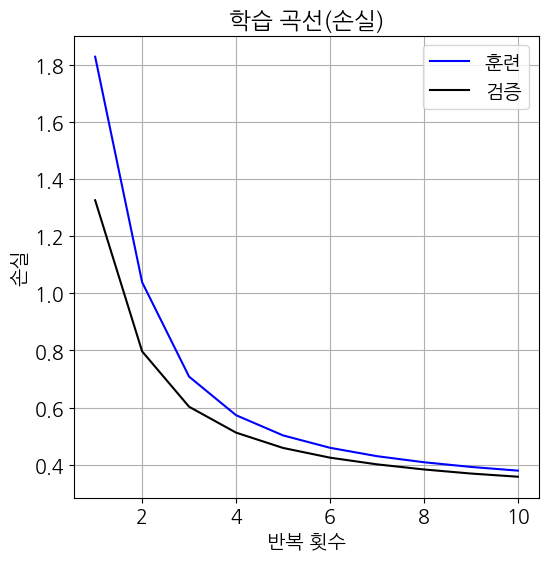

In [58]:
# ÌïôÏäµ Í≥°ÏÑ† Ï∂úÎ†•(ÏÜêÏã§)

plt.plot(history[:,0], history[:,1], 'b', label='ÌõàÎ†®')
plt.plot(history[:,0], history[:,3], 'k', label='Í≤ÄÏ¶ù')
plt.xlabel('Î∞òÎ≥µ ÌöüÏàò')
plt.ylabel('ÏÜêÏã§')
plt.title('ÌïôÏäµ Í≥°ÏÑ†(ÏÜêÏã§)')
plt.legend()
plt.show()

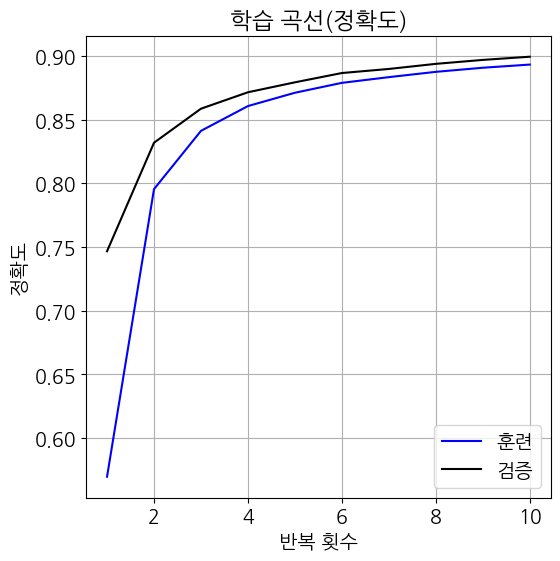

In [59]:
# ÌïôÏäµ Í≥°ÏÑ† Ï∂úÎ†•(Ï†ïÌôïÎèÑ)

plt.plot(history[:,0], history[:,2], 'b', label='ÌõàÎ†®')
plt.plot(history[:,0], history[:,4], 'k', label='Í≤ÄÏ¶ù')
plt.xlabel('Î∞òÎ≥µ ÌöüÏàò')
plt.ylabel('Ï†ïÌôïÎèÑ')
plt.title('ÌïôÏäµ Í≥°ÏÑ†(Ï†ïÌôïÎèÑ)')
plt.legend()
plt.show()

### Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†• ÌôïÏù∏

In [60]:
# Îç∞Ïù¥ÌÑ∞Î°úÎçîÏóêÏÑú Ï≤òÏùå Ìïú ÏÑ∏Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
for images, labels in test_loader:
    break

# ÏòàÏ∏° Í≤∞Í≥º Í∞ÄÏ†∏Ïò§Í∏∞
inputs = images.to(device)
labels = labels.to(device)
outputs = net(inputs)
predicted = torch.max(outputs, 1)[1]

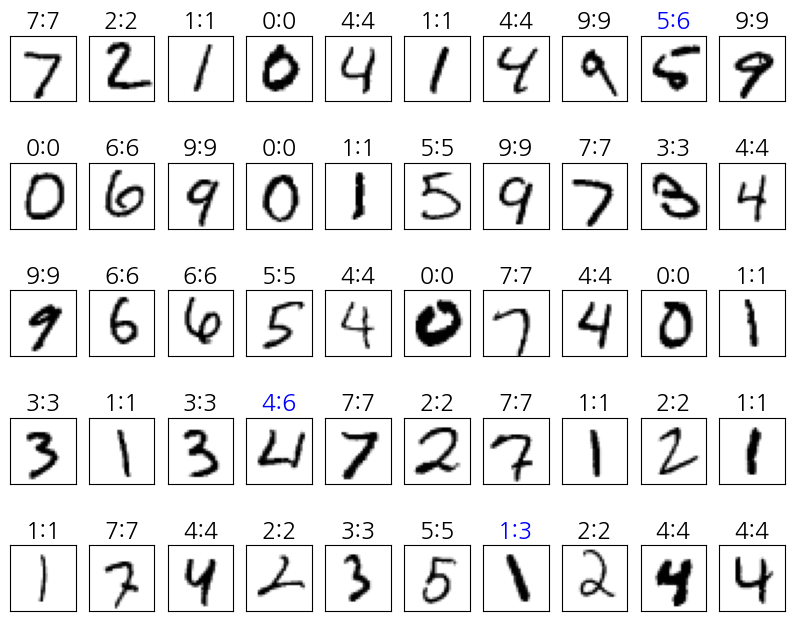

In [61]:
# Ï≤òÏùå 50Í±¥Ïùò Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ "Ï†ïÎãµ:ÏòàÏ∏°"ÏúºÎ°ú Ï∂úÎ†•

plt.figure(figsize=(10, 8))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)

  # ÎÑòÌååÏù¥ Î∞∞Ïó¥Î°ú Î≥ÄÌôò
  image = images[i]
  label = labels[i]
  pred = predicted[i]
  if (pred == label):
    c = 'k'
  else:
    c = 'b'

  # Ïù¥ÎØ∏ÏßÄÏùò Î≤îÏúÑÎ•º [0, 1] Î°ú ÎêòÎèåÎ¶º
  image2 = (image + 1)/ 2

  # Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
  plt.imshow(image2.reshape(28, 28),cmap='gray_r')
  ax.set_title(f'{label}:{pred}', c=c)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## 8.14 ÏùÄÎãâÏ∏µ Ï∂îÍ∞ÄÌïòÍ∏∞

In [62]:
# Î™®Îç∏ Ï†ïÏùò
# 784ÏûÖÎ†• 10Ï∂úÎ†•ÏùÑ Í∞ñÎäî 2Í∞úÏùò ÏùÄÎãâÏ∏µÏùÑ Ìè¨Ìï®Ìïú Ïã†Í≤ΩÎßù

class Net2(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # Ï≤´Î≤àÏß∏ ÏùÄÎãâÏ∏µ Ï†ïÏùò(ÏùÄÎãâÏ∏µ ÎÖ∏Îìú Ïàò: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # ÎëêÎ≤àÏß∏ ÏùÄÎãâÏ∏µ Ï†ïÏùò(ÏùÄÎãâÏ∏µ ÎÖ∏Îìú Ïàò: n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)

        # Ï∂úÎ†•Ï∏µ Ï†ïÏùò
        self.l3 = nn.Linear(n_hidden, n_output)

        # ReLU Ìï®Ïàò Ï†ïÏùò
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        x4 = self.relu(x3)
        x5 = self.l3(x4)
        return x5

In [63]:
# ÎÇúÏàò Í≥†Ï†ï
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# Î™®Îç∏ Ï¥àÍ∏∞Ìôî
net = Net2(n_input, n_output, n_hidden).to(device)

# ÏÜêÏã§ Ìï®ÏàòÔºö ÍµêÏ∞® ÏóîÌä∏Î°úÌîº Ìï®Ïàò
criterion = nn.CrossEntropyLoss()

# ÏµúÏ†ÅÌôî Ìï®Ïàò: Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [64]:
# Î™®Îç∏ Í∞úÏöî ÌëúÏãú 1

print(net)

Net2(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [65]:
# Î™®Îç∏ Í∞úÏöî ÌëúÏãú 2

summary(net, (784,))

Layer (type:depth-idx)                   Output Shape              Param #
Net2                                     [10]                      --
‚îú‚îÄLinear: 1-1                            [128]                     100,480
‚îú‚îÄReLU: 1-2                              [128]                     --
‚îú‚îÄLinear: 1-3                            [128]                     16,512
‚îú‚îÄReLU: 1-4                              [128]                     --
‚îú‚îÄLinear: 1-5                            [10]                      1,290
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
Total mult-adds (M): 14.99
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.47
Estimated Total Size (MB): 0.48

In [66]:
# Îç∞Ïù¥ÌÑ∞Î°úÎçîÏóêÏÑú Ï≤òÏùå Ìïú ÏÑ∏Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
for images, labels in test_loader:
    break

# ÏòàÏ∏° Í≤∞Í≥º Í∞ÄÏ†∏Ïò§Í∏∞
inputs = images.to(device)
labels = labels.to(device)

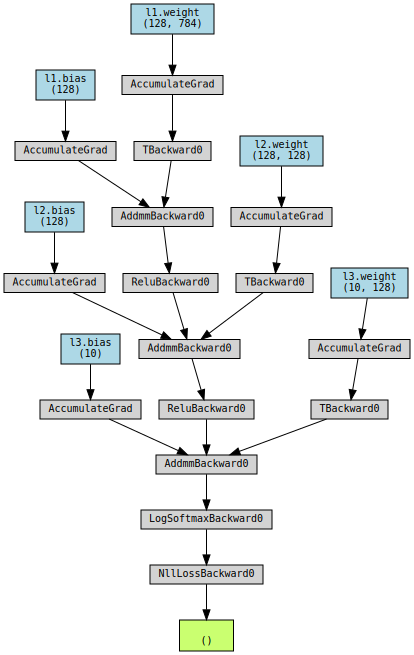

In [67]:
# ÏòàÏ∏° Í≥ÑÏÇ∞
outputs = net(inputs)

# ÏÜêÏã§ Í≥ÑÏÇ∞
loss = criterion(outputs, labels)

# ÏÜêÏã§ Í≥ÑÏÇ∞ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
make_dot(loss, params=dict(net.named_parameters()))

### Í≤ΩÏÇ¨ Í≥ÑÏÇ∞

In [68]:
# Í≤ΩÏÇ¨ Í≥ÑÏÇ∞
loss.backward()

# Í≤ΩÏÇ¨ Í≥ÑÏÇ∞ Í≤∞Í≥º ÏùºÎ∂Ä
w = net.to('cpu').l1.weight.grad.numpy()
print(w)

# Í∞Å ÏöîÏÜåÏùò Ï†àÎåìÍ∞í ÌèâÍ∑†
print(np.abs(w).mean())

[[-0.0007 -0.0007 -0.0007 ... -0.0007 -0.0007 -0.0007]
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]
 [-0.0005 -0.0005 -0.0005 ... -0.0005 -0.0005 -0.0005]
 ...
 [ 0.0015  0.0015  0.0015 ...  0.0015  0.0015  0.0015]
 [ 0.0002  0.0002  0.0002 ...  0.0002  0.0002  0.0002]
 [ 0.0003  0.0003  0.0003 ...  0.0003  0.0003  0.0003]]
0.0008487979


### Î∞òÎ≥µ Í≥ÑÏÇ∞

In [71]:
# ÎÇúÏàò Í≥†Ï†ï
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True


# Î™®Îç∏ Ï¥àÍ∏∞Ìôî
net = Net2(n_input, n_output, n_hidden).to(device)

# ÏÜêÏã§ Ìï®ÏàòÔºö ÍµêÏ∞® ÏóîÌä∏Î°úÌîº Ìï®Ïàò
criterion = nn.CrossEntropyLoss()

# ÏµúÏ†ÅÌôî Ìï®Ïàò: Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï
optimizer = optim.SGD(net.parameters(), lr=lr)

# Î∞òÎ≥µ ÌöüÏàò
num_epochs = 10

# ÌèâÍ∞Ä Í≤∞Í≥º Í∏∞Î°ù
history2 = np.zeros((0,5))

In [72]:
# Î∞òÎ≥µ Í≥ÑÏÇ∞ Î©îÏù∏ Î£®ÌîÑ

for epoch in range(num_epochs):
    train_acc = 0
    train_loss = 0
    val_acc = 0
    val_loss = 0
    n_train = 0
    n_test = 0

    # ÌõàÎ†® ÌéòÏù¥Ï¶à
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPUÎ°ú Ï†ÑÏÜ°
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Í≤ΩÏÇ¨ Ï¥àÍ∏∞Ìôî
        optimizer.zero_grad()

        # ÏòàÏ∏° Í≥ÑÏÇ∞
        outputs = net(inputs)

        # ÏÜêÏã§ Í≥ÑÏÇ∞
        loss = criterion(outputs, labels)

        # Í≤ΩÏÇ¨ Í≥ÑÏÇ∞
        loss.backward()

        # ÌååÎùºÎØ∏ÌÑ∞ ÏàòÏ†ï
        optimizer.step()

        # ÏòàÏ∏° ÎùºÎ≤® ÏÇ∞Ï∂ú
        predicted = torch.max(outputs, 1)[1]

        # ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

    # ÏòàÏ∏° ÌéòÏù¥Ï¶à
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        # ÏòàÏ∏° Í≥ÑÏÇ∞
        outputs_test = net(inputs_test)

        # ÏÜêÏã§ Í≥ÑÏÇ∞
        loss_test = criterion(outputs_test, labels_test)

        # ÏòàÏ∏° ÎùºÎ≤® ÏÇ∞Ï∂ú
        predicted_test = torch.max(outputs_test, 1)[1]

        # ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    # ÌèâÍ∞Ä Í≤∞Í≥º ÏÇ∞Ï∂ú, Í∏∞Î°ù
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history2 = np.vstack((history2, item))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [1/10], loss: 2.20163 acc: 0.25380 val_loss: 2.04576, val_acc: 0.49800


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [2/10], loss: 1.75820 acc: 0.60443 val_loss: 1.39272, val_acc: 0.68680


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [3/10], loss: 1.11284 acc: 0.75645 val_loss: 0.86510, val_acc: 0.80810


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.75170 acc: 0.82300 val_loss: 0.63477, val_acc: 0.84380


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.59030 acc: 0.84983 val_loss: 0.52462, val_acc: 0.86370


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.50672 acc: 0.86653 val_loss: 0.46400, val_acc: 0.87440


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.45680 acc: 0.87540 val_loss: 0.42148, val_acc: 0.88560


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.42335 acc: 0.88195 val_loss: 0.39551, val_acc: 0.89020


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.39965 acc: 0.88768 val_loss: 0.37600, val_acc: 0.89350


  0%|          | 0/120 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.38195 acc: 0.89183 val_loss: 0.35886, val_acc: 0.89880


In [73]:
# ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ ÌôïÏù∏

print(f'Ï¥àÍ∏∞ÏÉÅÌÉú : ÏÜêÏã§ : {history2[0,3]:.5f}  Ï†ïÌôïÎèÑ : {history2[0,4]:.5f}' )
print(f'ÏµúÏ¢ÖÏÉÅÌÉú : ÏÜêÏã§ : {history2[-1,3]:.5f}  Ï†ïÌôïÎèÑ : {history2[-1,4]:.5f}' )

Ï¥àÍ∏∞ÏÉÅÌÉú : ÏÜêÏã§ : 2.04576  Ï†ïÌôïÎèÑ : 0.49800
ÏµúÏ¢ÖÏÉÅÌÉú : ÏÜêÏã§ : 0.35886  Ï†ïÌôïÎèÑ : 0.89880


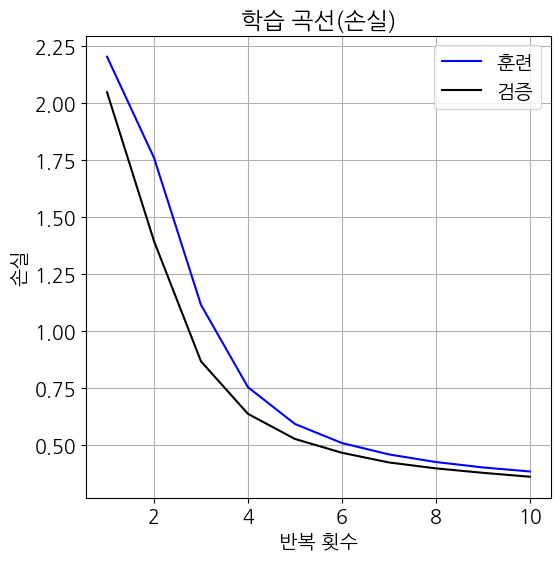

In [74]:
# ÌïôÏäµ Í≥°ÏÑ† Ï∂úÎ†•(ÏÜêÏã§)
plt.plot(history2[:,0], history2[:,1], 'b', label='ÌõàÎ†®')
plt.plot(history2[:,0], history2[:,3], 'k', label='Í≤ÄÏ¶ù')
plt.xlabel('Î∞òÎ≥µ ÌöüÏàò')
plt.ylabel('ÏÜêÏã§')
plt.title('ÌïôÏäµ Í≥°ÏÑ†(ÏÜêÏã§)')
plt.legend()
plt.show()

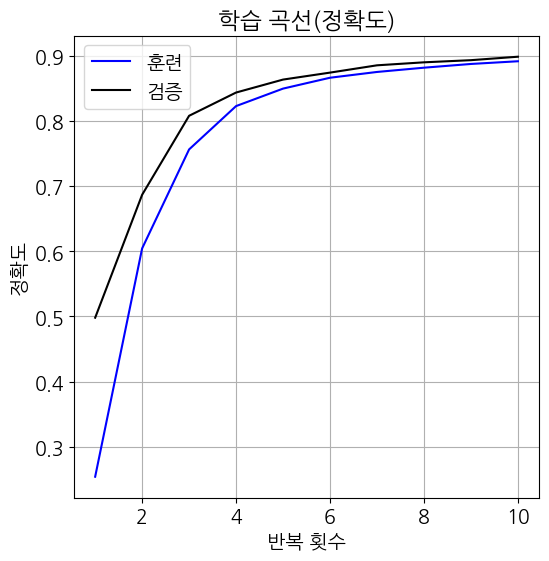

In [75]:
# ÌïôÏäµ Í≥°ÏÑ† Ï∂úÎ†•(Ï†ïÌôïÎèÑ)

plt.plot(history2[:,0], history2[:,2], 'b', label='ÌõàÎ†®')
plt.plot(history2[:,0], history2[:,4], 'k', label='Í≤ÄÏ¶ù')
plt.xlabel('Î∞òÎ≥µ ÌöüÏàò')
plt.ylabel('Ï†ïÌôïÎèÑ')
plt.title('ÌïôÏäµ Í≥°ÏÑ†(Ï†ïÌôïÎèÑ)')
plt.legend()
plt.show()

### ÏπºÎüº Í≤ΩÏÇ¨ ÏÜêÏã§Í≥º ReLU Ìï®Ïàò

In [76]:
# Î™®Îç∏ Ï†ïÏùò -„ÄÄÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®Ïàò Î≤ÑÏ†Ñ
# 784ÏûÖÎ†• 10Ï∂úÎ†•ÏùÑ Í∞ñÎäî 2Í∞úÏùò ÏùÄÎãâÏ∏µÏùÑ Ìè¨Ìï®Ìïú Ïã†Í≤ΩÎßù

class Net3(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # Ï≤´Î≤àÏß∏ ÏùÄÎãâÏ∏µ Ï†ïÏùò(ÏùÄÎãâÏ∏µ ÎÖ∏Îìú Ïàò: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # ÎëêÎ≤àÏß∏ ÏùÄÎãâÏ∏µ Ï†ïÏùò(ÏùÄÎãâÏ∏µ ÎÖ∏Îìú Ïàò: n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)

        # Ï∂úÎ†•Ï∏µ Ï†ïÏùò
        self.l3 = nn.Linear(n_hidden, n_output)

        # ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®Ïàò Ï†ïÏùò
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.sigmoid(x1)
        x3 = self.l2(x2)
        x4 = self.sigmoid(x3)
        x5 = self.l3(x4)
        return x5

In [77]:
# ÎÇúÏàò Í≥†Ï†ï
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# Î™®Îç∏ Ï¥àÍ∏∞Ìôî
net = Net3(n_input, n_output, n_hidden).to(device)

# ÏÜêÏã§ Ìï®ÏàòÔºö ÍµêÏ∞® ÏóîÌä∏Î°úÌîº Ìï®Ïàò
criterion = nn.CrossEntropyLoss()

# ÏµúÏ†ÅÌôî Ìï®Ïàò: Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [78]:
# Îç∞Ïù¥ÌÑ∞Î°úÎçîÏóêÏÑú Ï≤òÏùå Ìïú ÏÑ∏Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
for images, labels in test_loader:
    break

# ÏòàÏ∏° Í≤∞Í≥º Í∞ÄÏ†∏Ïò§Í∏∞
inputs = images.to(device)
labels = labels.to(device)

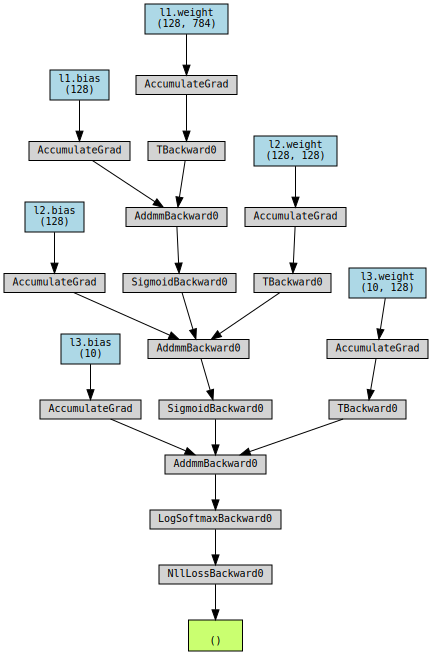

In [79]:
# ÏòàÏ∏° Í≥ÑÏÇ∞
outputs = net(inputs)

# ÏÜêÏã§ Í≥ÑÏÇ∞
loss = criterion(outputs, labels)

# ÏÜêÏã§ Í≥ÑÏÇ∞ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
make_dot(loss, params=dict(net.named_parameters()))

In [80]:
# Í≤ΩÏÇ¨ Í≥ÑÏÇ∞
loss.backward()

# Í≤ΩÏÇ¨ Í≥ÑÏÇ∞ Í≤∞Í≥ºÏùò ÏùºÎ∂Ä
w = net.to('cpu').l1.weight.grad.numpy()
print(w)

# Í∞Å ÏöîÏÜåÏùò Ï†àÎåìÍ∞í ÌèâÍ∑†
print(np.abs(w).mean())

[[ 0.0001  0.0001  0.0001 ...  0.0001  0.0001  0.0001]
 [ 0.0001  0.0001  0.0001 ...  0.0001  0.0001  0.0001]
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]
 ...
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]
 [ 0.0002  0.0002  0.0002 ...  0.0002  0.0002  0.0002]
 [-0.0001 -0.0001 -0.0001 ... -0.0001 -0.0001 -0.0001]]
0.00017514593


**Îî•Îü¨ÎãùÏóêÏÑúÏùò Í≤ΩÏÇ¨ ÏÜêÏã§**
ReLU Ìï®ÏàòÏùò Í≤ΩÏö∞ l1.weightÏùò Í∞Å ÏöîÏÜåÏùò Ï†àÎåìÍ∞í ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìïú Í≤∞Í≥º 0.000848Ïù¥ÏóàÍ≥†, Ïù¥Ïóê Î∞òÌï¥ ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÏùò Í≤ΩÏö∞, 0.000175Î°ú ÏÉÅÎãπÌûà ÏûëÏùÄ Í∞íÏùÑ ÏñªÏóàÎã§.
ÏùÄÎãâÏ∏µÏù¥ ÎëêÍ∫ºÏõåÏßà ÏàòÎ°ù Ïù¥ Ï∞®Ïù¥Îäî Ïª§ÏßÑÎã§. Î≥µÏû°Ìïú Ìï©ÏÑ± Ìï®ÏàòÏùò Í≤ΩÏÇ¨ Í∞íÏùÄ ÎèÑÏ§ëÏùò Ìï®ÏàòÏùò ÎØ∏Î∂Ñ Í≤∞Í≥ºÎ•º Ï†ÑÎ∂Ä Í≥±Ìïú Í≤ÉÏù¥ ÎêúÎã§.
Í∑∏Îü∞Îç∞ ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÏùò Í≤ΩÏö∞, ÏûÖÎ†• Í∞íÏù¥ 0ÏúºÎ°úÎ∂ÄÌÑ∞ Î©ÄÎ¶¨ Îñ®Ïñ¥ÏßàÏàòÎ°ù Í∏∞Ïö∏Í∏∞(=Í≤ΩÏÇ¨Í∞í)Îäî 0Ïóê Í∞ÄÍπåÏõåÏßÑÎã§. Ìï©ÏÑ± Ìï®Ïàò ÎÇ¥Î∂ÄÏóêÏÑú ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÎ•º Ïó¨Îü¨Î≤à Í±∞ÏπòÍ≤å ÎêòÎ©¥, Í∞íÏùÄ Ï†êÏ∞® 0ÏúºÎ°ú ÏàòÎ†¥Ìï¥Í∞ÑÎã§.
ÌïôÏäµÏùÄ Í≤ΩÏÇ¨ Í∞íÏùÑ Í∏∞Î∞òÏúºÎ°ú Ïù¥Î§ÑÏßÄÎäî Ï≤òÎ¶¨Ïù¥ÎØÄÎ°ú, Í≤ΩÏÇ¨ Í∞íÏù¥ 0Ïóê Í∞ÄÍπåÏõåÏßÑ Í≤ΩÏö∞, ÌïôÏäµÏùÄ Í∑πÌïúÏúºÎ°ú Ïñ¥Î†§ÏõåÏßÄÍ≤å ÎêúÎã§.
ReLU Ìï®ÏàòÎäî ÏûÖÎ†•Í∞íÏù¥ +Ïù¥Í∏∞Îßå ÌïòÎ©¥, xÍ∞íÏóê ÏÉÅÍ¥ÄÏóÜÏù¥ Í≤ΩÏÇ¨ Í∞íÏùÄ Ìï≠ÏÉÅ ÏùºÏ†ïÌïòÎã§. Ï¶â, Í≤ΩÏÇ¨ ÏÜåÏã§Ïù¥ ÏùºÏñ¥ÎÇòÍ∏∞ ÌûòÎì§Îã§.

### ÏπºÎüº ÎûåÎã§ ÌëúÌòÑÏãùÏùÑ ÌôúÏö©Ìïú Ìï®Ïàò Ï†ïÏùò

In [81]:
# ÏùºÎ∞òÏ†ÅÏù∏ Ìï®ÏàòÏùò Ï†ïÏùò

def f(x):
    return (2 * x**2 + 2)

In [82]:
x = np.arange(-2, 2.1, 0.25)
y = f(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


In [83]:
# ÎûåÎã§ ÌëúÌòÑÏãùÏúºÎ°ú Ìï®Ïàò Ï†ïÏùò

g = lambda x: 2 * x**2 + 2

In [84]:
y = g(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


Lamda ÌÅ¥ÎûòÏä§Î•º Ìò∏Ï∂úÌï®Í≥º ÎèôÏãúÏóê Ìï®ÏàòÏùò Ï†ïÏùòÍ∞Ä Í∞ÄÎä•ÌïòÎã§.
Ìï®ÏàòÎ•º Îî∞Î°ú Ï†ïÏùòÌïòÍ≥†, Ìò∏Ï∂úÌï† ÌïÑÏöîÍ∞Ä ÏóÜÎã§

### ÏπºÎüº Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÏôÄ Ï†ïÌôïÎèÑÏùò Í¥ÄÍ≥Ñ

Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÎ•º ÏûëÍ≤å ÌïòÎ©¥ Ï†ïÌôïÎèÑÍ∞Ä Ìñ•ÏÉÅÎêúÎã§.
ÎØ∏Îãà Î∞∞Ïπò ÌïôÏäµÎ≤ïÏóêÏÑú Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÎäî Îß§Ïö∞ Ï§ëÏöîÌïú ÌäúÎãù ÌååÎùºÎØ∏ÌÑ∞Ïù¥Îã§.